In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Check TensorFlow version
print(tf.__version__)
try:
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    print("Data loaded successfully")
    print(f"Training images shape: {train_images.shape}")
except Exception as e:
    print(f"Error loading MNIST data: {e}")

2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data loaded successfully
Training images shape: (60000, 28, 28)


In [ ]:
# preprocessing
def preprocess_data(images, labels):
    # Normalize and reshape images
    images = images.astype('float32') / 255.0
    images = images.reshape((-1, 28, 28, 1))

    # One-hot encode labels
    labels = tf.keras.utils.to_categorical(labels)

    return images, labels

# Apply preprocessing
train_images, train_labels = preprocess_data(train_images, train_labels)
test_images, test_labels = preprocess_data(test_images, test_labels)

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [ ]:
# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Train the model
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 60ms/step - accuracy: 0.8567 - loss: 0.4711 - val_accuracy: 0.9796 - val_loss: 0.0711
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9794 - loss: 0.0657 - val_accuracy: 0.9843 - val_loss: 0.0536
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9872 - loss: 0.0418 - val_accuracy: 0.9834 - val_loss: 0.0512
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9914 - loss: 0.0288 - val_accuracy: 0.9883 - val_loss: 0.0409
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9877 - val_loss: 0.0415
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9861 - loss: 0.0419
Test accuracy: 0.9893


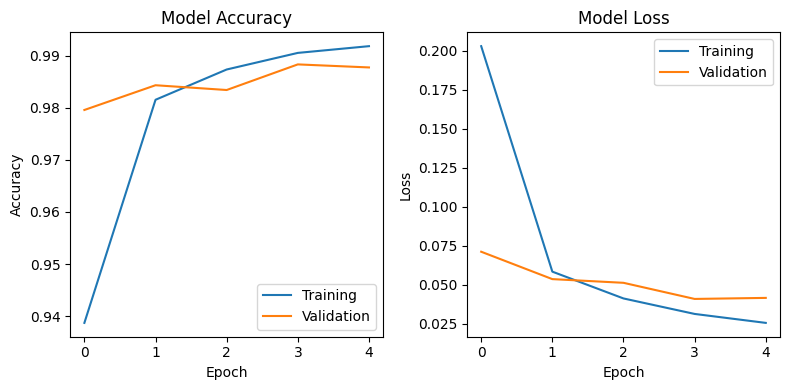

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


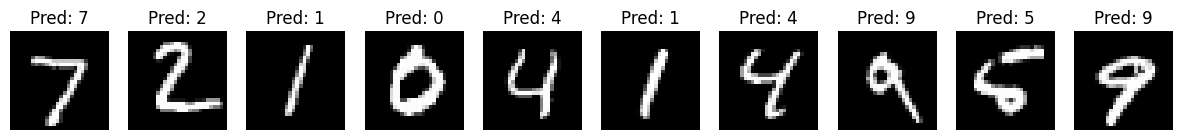

In [ ]:
# Make predictions
import numpy as np
predictions = model.predict(test_images[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Plot some test images and their predictions
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predicted_labels[i]}')
    plt.axis('off')
plt.show()

In [ ]:
# Load model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5')

# Compile the model again with metrics
loaded_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Evaluate on a small batch to build metrics
_ = loaded_model.evaluate(test_images[:10], test_labels[:10], verbose=0)

# Now make predictions
predictions = loaded_model.predict(test_images[:1])
predicted_label = tf.argmax(predictions, axis=1).numpy()[0]
print(f"Predicted label for the first test image: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted label for the first test image: 7


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


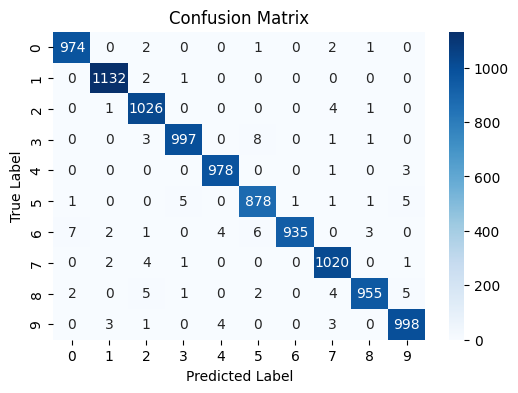

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib

# Get predictions for all test data
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Changed 'blues' to 'Blues'
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Find the most frequent misclassifications from the confusion matrix
misclassifications = []
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i != j:
            misclassifications.append(((i, j), cm[i, j]))
misclassifications.sort(key=lambda item: item[1], reverse=True)
print("Top 10 Most Frequent Misclassifications:")
print("-" * 40)
for (true_label, predicted_label), count in misclassifications[:10]:
    print(f"True: {true_label}, Predicted: {predicted_label}, Count: {count}")

Top 10 Most Frequent Misclassifications:
----------------------------------------
True: 3, Predicted: 5, Count: 8
True: 6, Predicted: 0, Count: 7
True: 6, Predicted: 5, Count: 6
True: 5, Predicted: 3, Count: 5
True: 5, Predicted: 9, Count: 5
True: 8, Predicted: 2, Count: 5
True: 8, Predicted: 9, Count: 5
True: 2, Predicted: 7, Count: 4
True: 6, Predicted: 4, Count: 4
True: 7, Predicted: 2, Count: 4


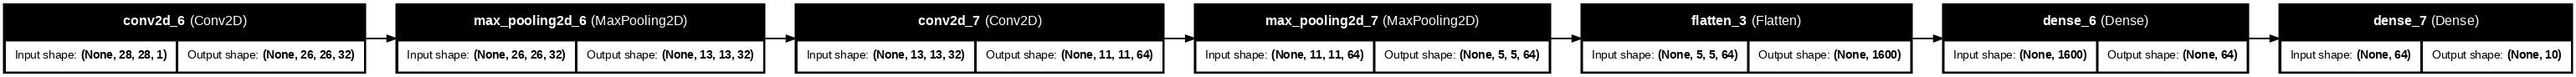

In [ ]:
from tensorflow.keras.utils import plot_model

# model visualization
plot_model(
    model,
    to_file='model_small.png',
    show_shapes=True,
    show_layer_names=True,
    dpi=72,
    rankdir='LR'  # Left to Right layout
)
from IPython.display import Image
Image('model_small.png')